# Data Retrival

The data retrival part of this project has been done in a different repository which you can find [here](https://github.com/prp-e/digistyle_data_retrive) and it works on a fashion retail store in Iran. You can change it accordingly, but here we just use it for educational purposes only.

## Processing the retrived data

In this part, we're just processing the data in a format that we understand better. Because we're going to perform match-finding and then a search on them. Basically, we need to:

* Download Images
* Store images in a reliable place
* Collect addresses and images in a CSV file (or a database)

The whole procedure is like that, and there's no music theory or rocket science involved.

In [2]:
import json

raw_file = open('products.json')

json_file = json.loads(raw_file.read())

In [8]:
import os
import wget
import pandas as pd

product_csv = []
out_dir = 'data/images/'

In [11]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

## Making the dataset

In [15]:
import time

for product in json_file:
    product_info = []
    file = wget.download(product['picture'], out=out_dir)
    product_info.append(file)
    product_info.append(product['url'])
    
    product_csv.append(product_info)
    time.sleep(1)

In [17]:
len(product_csv)

360

## Creating the CSV file

In [18]:
df = pd.DataFrame(product_csv)

In [19]:
df.head()

,0,1
0,data/images//23f988c31a34fa02610b3ee5554bb1b4c...,https://www.digistyle.com/product/7051816-بلوز...
1,data/images//ac569b3b0368b95d1677e7aaf15bd0628...,https://www.digistyle.com/product/7050133-بلوز...
2,data/images//7f9b29bc94dee0a0092c7f79eadbd876f...,https://www.digistyle.com/product/5134826-پولو...
3,data/images//b491886f4c39e271fb1762c253ddcc165...,https://www.digistyle.com/product/8641527-شلوا...
4,data/images//b5fcc805c22e024f10e292bf2984a435e...,https://www.digistyle.com/product/7050136-بلوز...


In [20]:
df.to_csv('data/products.csv', index=False, header=False)

# Visual Search Initiation

In [21]:
from DeepImageSearch import Index,LoadData,SearchImage

In [22]:
image_list = LoadData().from_folder(['data/images'])

## Indexing images

In [27]:
Index(image_list).Start()

553476096/553467096 [==============================] - 1309s 2us/step


100%|██████████| 360/360 [00:57<00:00,  6.23it/s]
360it [00:00, 2365.57it/s]


Image Meta Information Saved: [meta-data-files/image_data_features.pkl]
Saved the Indexed File:[meta-data-files/image_features_vectors.ann]


## Performing basic search

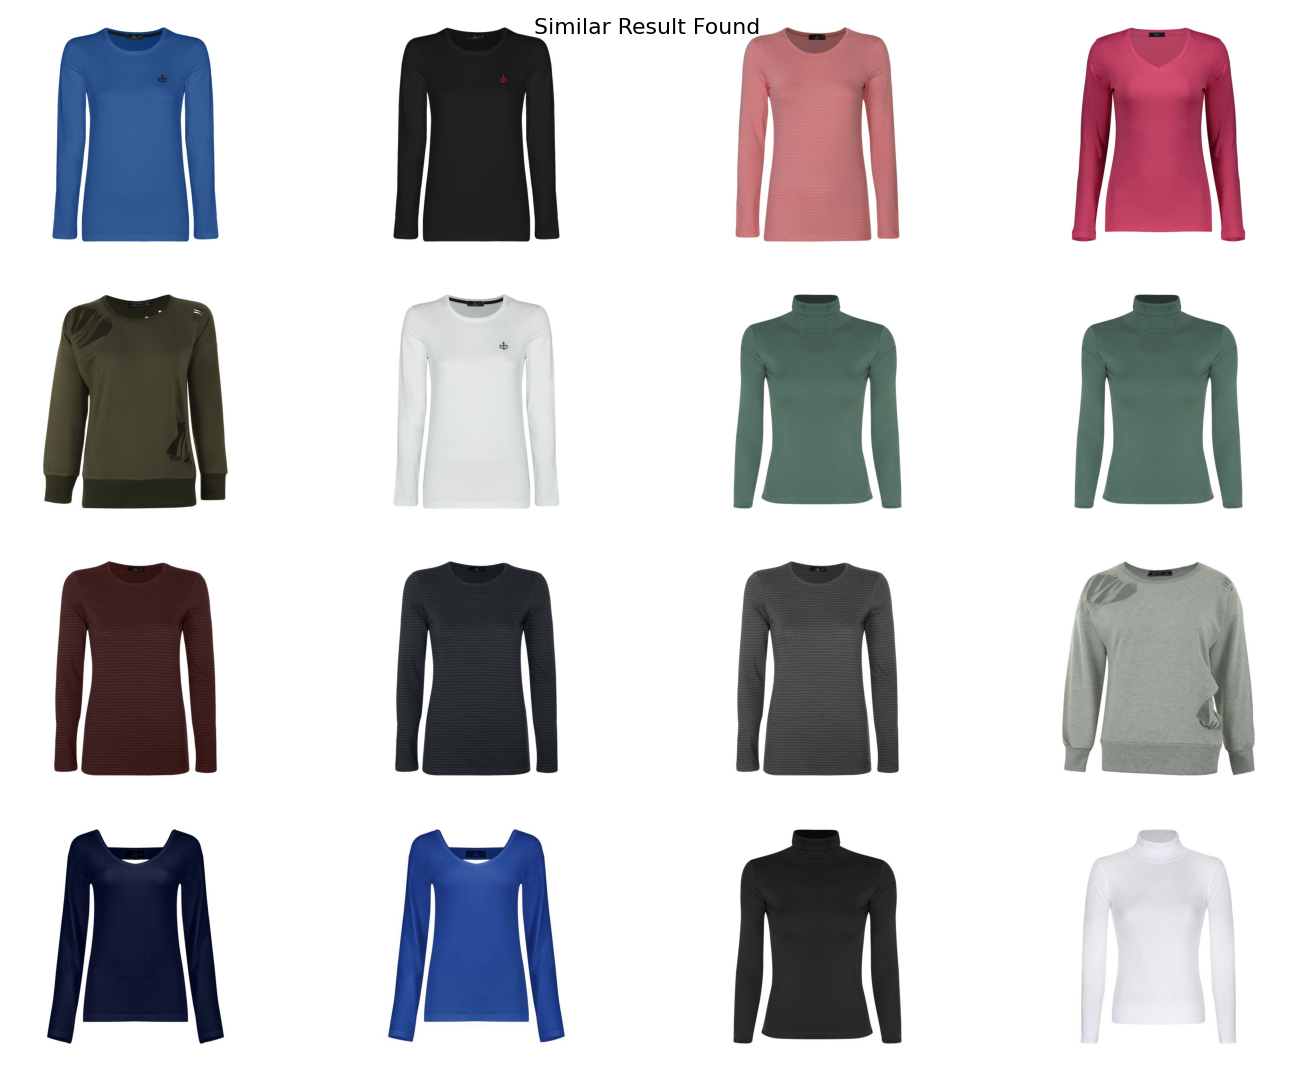

In [30]:
SearchImage().plot_similar_images(image_path='data/images/1b4dbc958dd25cbeed2c449d421009346fd96772_1615297647.jpg')

## Searching on a different image (from a different source)

In [31]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('test_data/short_skirt.jpg')

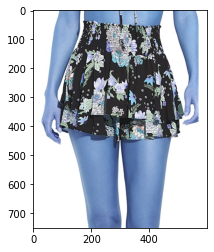

In [32]:
%matplotlib inline

plt.imshow(image)

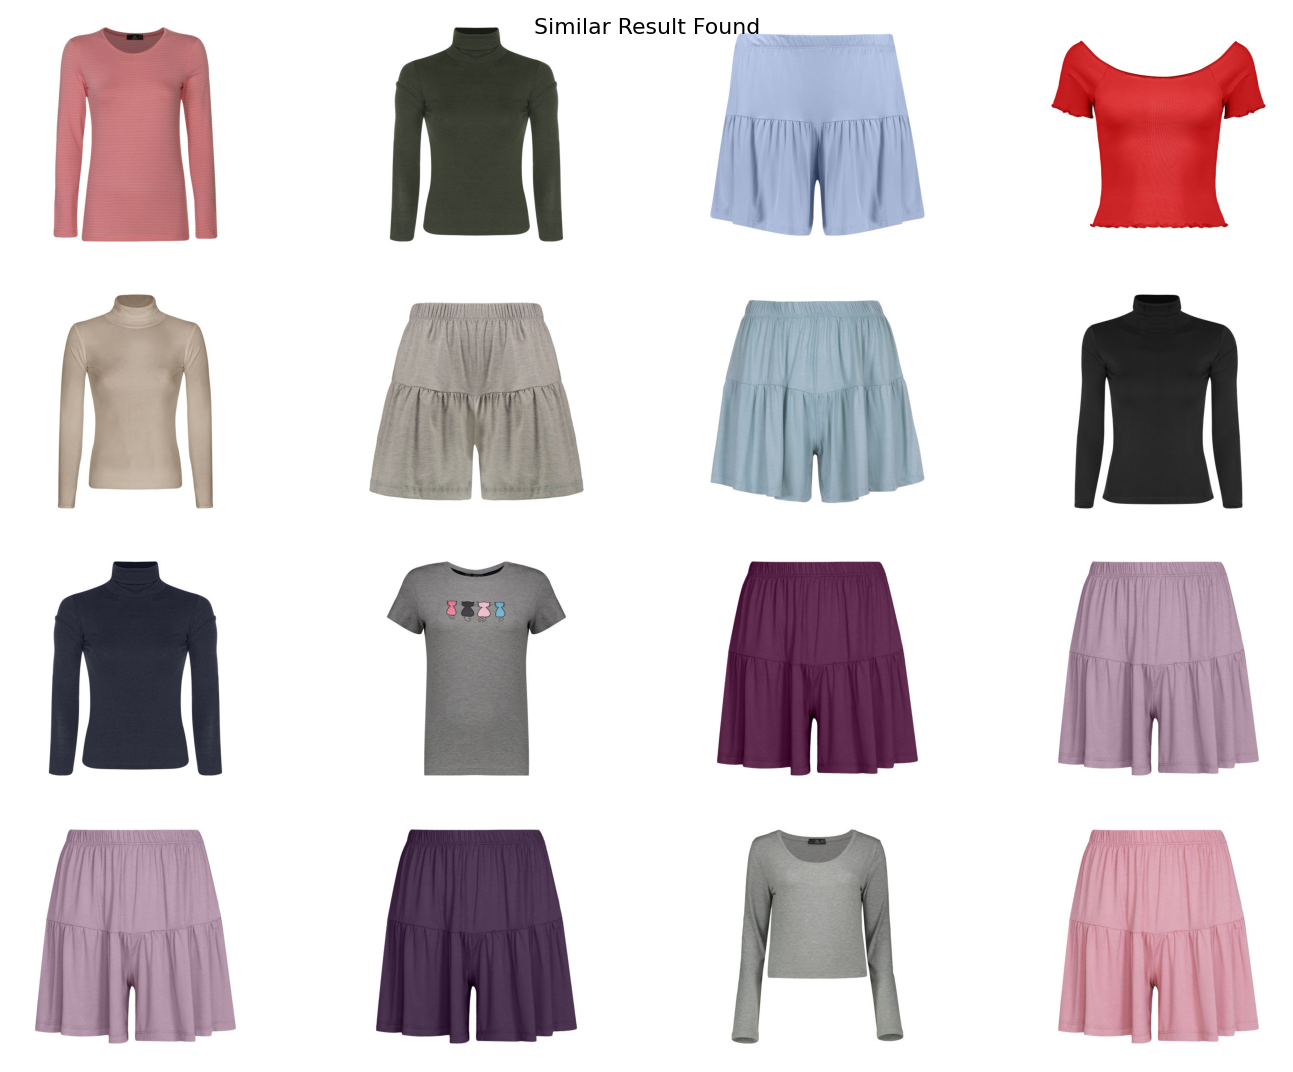

In [33]:
SearchImage().plot_similar_images(image_path='test_data/short_skirt.jpg')